In [2]:
# Using the tweepy handler to collect the tweets

# Retrieving the consumer key, consumer secret, access token and access secret from the tokens.py File
import Tokens

import tweepy
from tweepy import OAuthHandler
import pandas as pd
import sys
encodingTot = sys.stdout.encoding or 'utf-8'
 
consumer_key = Tokens.consumer_key
consumer_secret = Tokens.consumer_secret
 
access_token = Tokens.access_token
access_secret = Tokens.access_secret
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [3]:
# testing authentication

try:
    api.verify_credentials()
    print("Authentication Successful")
except:
    print("Error during authentication")

Authentication Successful


In [2]:
import datetime

columns = ['id','name', 'tweet', 'retweets_count','location','created','followers_count','geo','hashtags','verified','retweeted']
 
tweet_dataframe = pd.DataFrame(columns=columns)
 
num_tweets = 50

for tweet in tweepy.Cursor(api.search_full_archive,environment_name = "prod", query="elections lang:en",fromDate="202003012315",toDate="202011082315",maxResults="100").items(num_tweets):


    lenDF = len(tweet_dataframe)
 
    tweet_dataframe.loc[lenDF] = [tweet.user.id,tweet.user.screen_name, tweet.text, tweet.retweet_count, tweet.user.location,tweet.created_at.strftime("%d-%b-%Y"),tweet.user.followers_count,tweet.geo,tweet.entities["hashtags"],tweet.user.verified,tweet.retweeted]
         
tweet_dataframe.to_csv("2021Tweets.csv",mode='a', sep='\t', encoding = encodingTot,header=False)
 
tweet_dataframe = pd.read_csv(open('2021Tweets.csv','rU'), sep='\t', engine='c')
 
tweet_dataframe.head()

NameError: name 'tweepy' is not defined

# Run code from here


In [113]:
import pandas as pd
import numpy as np
import string
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

def preprocessing(df):
    lemmatizer_filter = WordNetLemmatizer()
    
    # putting the tweets into a list
    tweet_list = df['tweet'].tolist()
    
    for i in range(len(tweet_list)):
        # By the usage of regex lines of code
        # RRemove special characters (eg: starting with @ Links)
        tweet_list[i]= ' '.join(re.sub("(@[A-Za-z0-9]+)", " ", tweet_list[i]).split()) 
        tweet_list[i]= ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet_list[i]).split()) 
        tweet_list[i]= ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet_list[i]).split()) 
        # Remove url's starting with http and https
        tweet_list[i]= ' '.join(re.sub("r'http\S+'", " ", tweet_list[i]).split()) 
        # removing the html tags which are unnecessary
        html_tags_toremove = re.compile('<.*?>')
        # Deleting the unwanted stopwords using nltk library
        tweet_list[i]=' '.join([token.lower() for token in tweet_list[i].split() if len(token)>3 and token.lower() not in stopwords.words('english')])
        tweet_list[i]=' '.join(re.sub(html_tags_toremove, '', tweet_list[i]).split())
        tweet_list[i] = ' '.join([lemmatizer_filter.lemmatize(word) for word in tweet_list[i].split()])
        # Remove RT->signifies Retweet keyword in the tweet list
        tweet_list[i]=' '.join(re.sub("RT", " ", tweet_list[i]).split())
        tweet_list[i]=' '.join(re.sub("rt", " ", tweet_list[i]).split())
        tweet_list[i]=' '.join(re.sub("rt", " ", tweet_list[i]).split())
        tweet_list[i]=' '.join(re.sub("r'(?:^|\s)([#?])(\w+)'", " ", tweet_list[i]).split())
#     tweet_final= [' '.join(item) for item in tweet_list]
    
    df['tweet']=tweet_list
       
    '''
    Return dataframe here
    '''
    return df
    


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\revan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [114]:
precovid_df= pd.read_csv(open('2019Tweets Jan - May 550.csv','rU',encoding='utf-8'), sep='\t', engine='c')
covid_timeline= pd.read_csv(open('2020Tweets Random - 200.csv','rU',encoding='utf-8'), sep='\t', engine='c')

In [115]:
def cleaned_hashtags(x):
    y = x.split(',')
    tags = []
    for tag in y:
        if tag.find('text') != -1:
            tags.append(tag.split(':')[-1].strip(' ').strip('\''))
    return ' '.join(tags) 

In [116]:
precovid_df['hashtags'] = precovid_df['hashtags'].apply(lambda x : cleaned_hashtags(x))
covid_timeline['hashtags'] = covid_timeline['hashtags'].apply(lambda x : cleaned_hashtags(x))

In [117]:
precovid_df

,Unnamed: 0,id,name,tweet,retweets_count,location,created,followers_count,geo,hashtags,verified,retweeted
0,0,15795274,tkripas,Don't bother inviting me to catch up over coff...,0,Chicagoland,29-Jan-2019,1046,NaN,,False,False
1,1,3368318501,MrJLSimpson,RT @CNHSBullDogs: CNHS 8th Grade Parent - Stud...,0,"Indiana, USA",29-Jan-2019,206,NaN,,False,False
2,2,576491140,MaryGetzHouses,Have You Noticed? The Housing Market Is Starti...,0,Southwest IN,29-Jan-2019,245,NaN,,False,False
3,3,3254024678,NVRgonloseGucci,2019 starting real different,0,"Spanish Town🇯🇲Queens NY, ATL",29-Jan-2019,248,NaN,,False,False
4,4,937682714,BGoodAngus,"RT @cdnangus: Starting Feb 2019, the Temple Ta...",0,NaN,29-Jan-2019,1358,NaN,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
545,45,1100847030824566787,ItalianWearing,RT @bpashaa: @RanveerOfficial is definitely to...,0,NaN,20-May-2019,152,NaN,Caterpillar,False,False
546,46,1100847030824566787,ItalianWearing,RT @_rchie0425: People making fun of #Priyanka...,0,NaN,20-May-2019,152,NaN,PriyankaChopra MetGala,False,False
547,47,1100847030824566787,ItalianWearing,RT @800casting: A little bit of Hollywood goss...,0,NaN,20-May-2019,152,NaN,metgala met gossip ladygaga,False,False
548,48,1100847030824566787,ItalianWearing,RT @KGmeansbusiness: My sister's take on #Ezra...,0,NaN,20-May-2019,152,NaN,EzraMiller MetGala MetGala2019 eyes art painti...,False,False


In [122]:
def find_top_n_hashtags(df, n):
    tags = []
    tag_pattern = re.compile(r"#[a-zA-Z]+")
    tag_matches = list(df['tweet'].apply(tag_pattern.findall))
    tagStore = {}
    for item in tag_matches:
        for token_match in item:
            if token_match not in tagStore.keys():
                tagStore[token_match] = 1
            else:
                tagStore[token_match] = tagStore[token_match]+1
    
    ordList =sorted(tagStore.items(), key=lambda x:x[1])
    ordList = ordList[::-1]
    # Differentiating hashtags into separate lists
    ordValues = []
    ordKeys = []
    for i in ordList[0:n]:
        ordKeys.append(i[0])
        ordValues.append(i[1])
    
    return ordKeys,ordValues

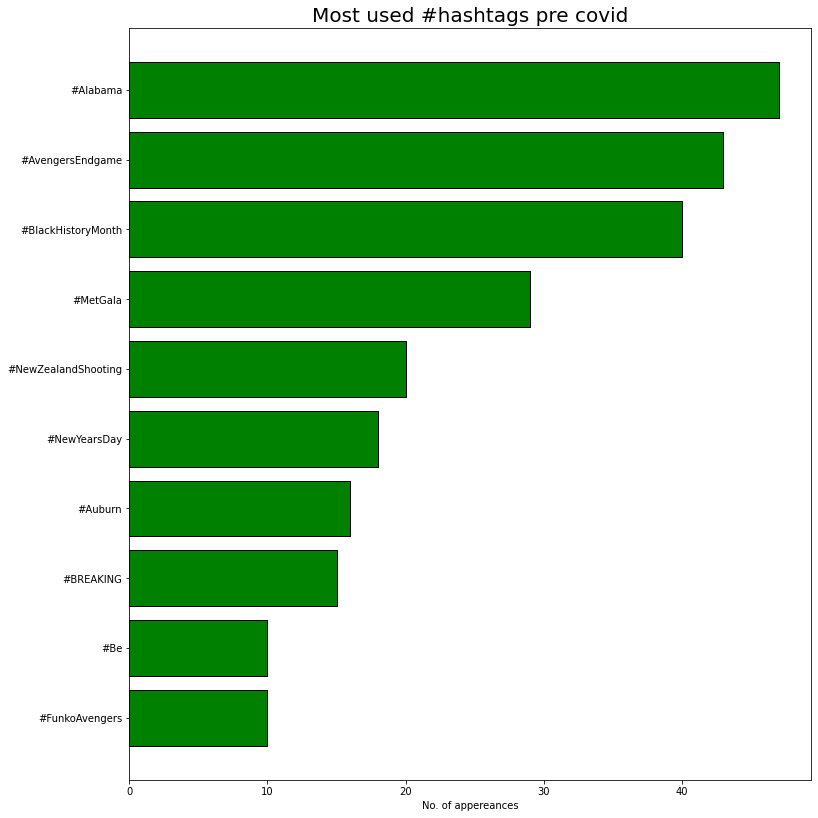

In [123]:
tagKeys, tagValues = find_top_n_hashtags(precovid_df, 10)

# Visualization for retrieving the most used hashtags

fig, ax = plt.subplots(figsize = (12,12))
yCoords = np.arange(len(tagKeys))
ax.barh(yCoords ,list(tagValues)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(yCoords)
ax.set_yticklabels(list(tagKeys)[::-1])
ax.set_xlabel("No. of appereances")
ax.set_title("Most used #hashtags pre covid", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()
fig.savefig("hashtags_precovid.png", dpi=1400)

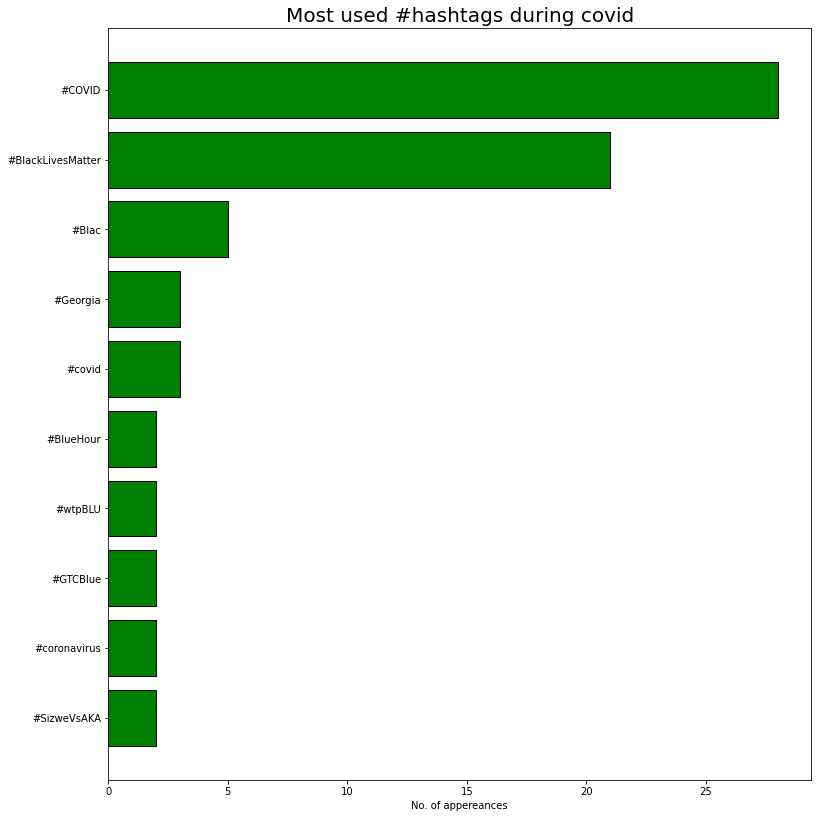

In [124]:
tagKeys, tagValues = find_top_n_hashtags(covid_timeline, 10)
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
yCoords = np.arange(len(tagKeys))
ax.barh(yCoords ,list(tagValues)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(yCoords)
ax.set_yticklabels(list(tagKeys)[::-1])
ax.set_xlabel("No. of appereances")
ax.set_title("Most used #hashtags during covid", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()
fig.savefig("hashtags_covid.png", dpi=1400)

In [125]:
def find_top_n_mentioned_accounts(df, n):
    observedAcc = re.compile(r"@[a-zA-Z_]+")
    observedMatches = list(df['tweet'].apply(observedAcc.findall))
    storeForMentions = {}
    for observedMatch in observedMatches:
        for currentMatch in observedMatch:
            if currentMatch not in storeForMentions.keys():
                storeForMentions[currentMatch] = 1
            else:
                storeForMentions[currentMatch] = storeForMentions[currentMatch]+1
                
    ordList = sorted(storeForMentions.items(), key=lambda x:x[1])
    ordList = ordList[::-1]

    ordVals = []
    ordKeys = []
    for i in ordList[0:n]:
        ordKeys.append(i[0])
        ordVals.append(i[1])
    
    return ordKeys, ordVals

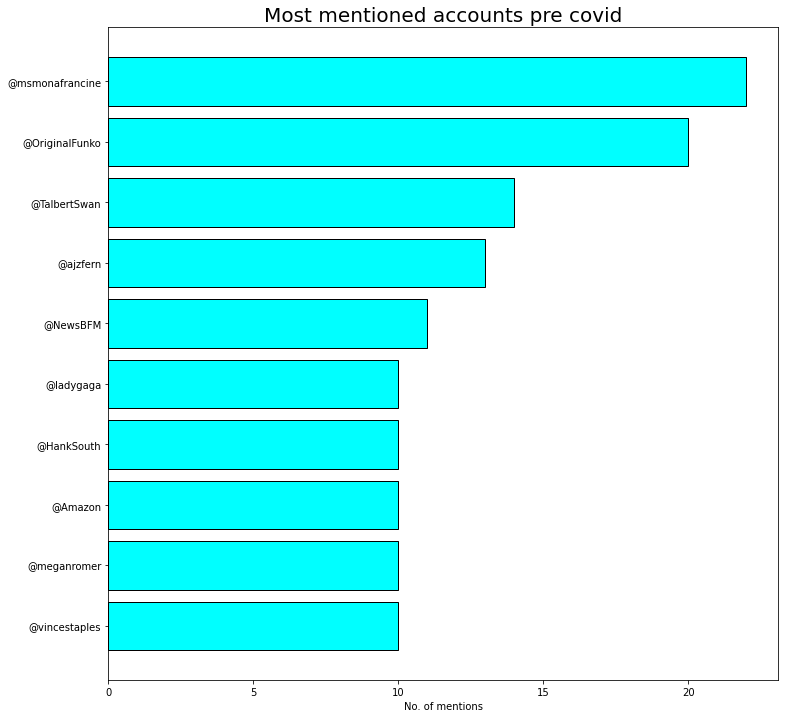

In [126]:
m_ord_keys , m_ord_vals = find_top_n_mentioned_accounts(precovid_df, 10)
fig, ax = plt.subplots(figsize = (12,12))
yCoords = np.arange(len(m_ord_vals))
ax.barh(yCoords ,list(m_ord_vals)[::-1], align='center', color = 'cyan', edgecolor = 'black', linewidth=1)
ax.set_yticks(yCoords )
ax.set_yticklabels(list(m_ord_keys)[::-1])
ax.set_xlabel("No. of mentions")
ax.set_title("Most mentioned accounts pre covid", fontsize = 20)
plt.show()
fig.savefig("accounts_precovid.png", dpi=1400)

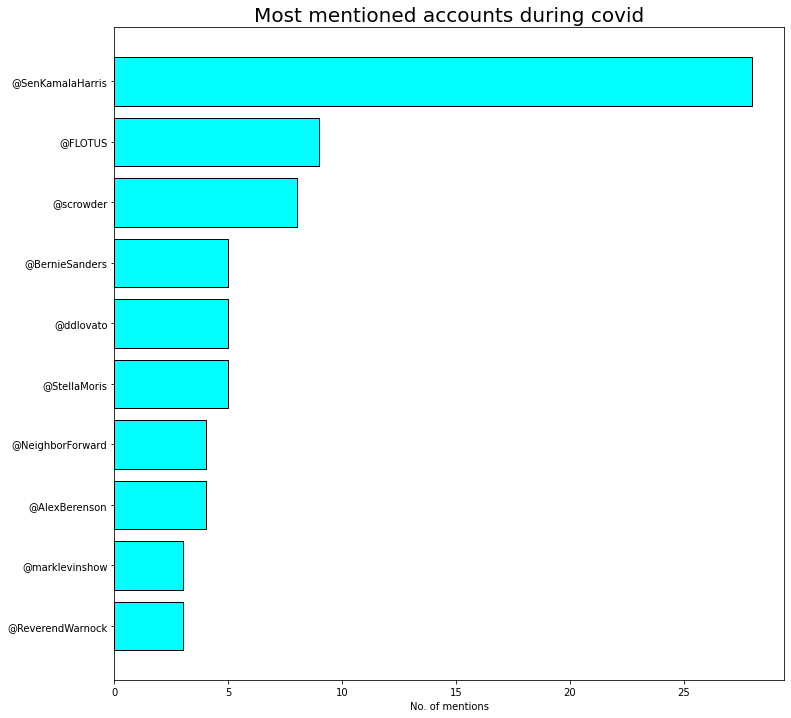

In [127]:
m_ord_keys , m_ord_vals = find_top_n_mentioned_accounts(covid_timeline, 10)
fig, ax = plt.subplots(figsize = (12,12))
yCoords = np.arange(len(m_ord_vals))
ax.barh(yCoords ,list(m_ord_vals)[::-1], align='center', color = 'cyan', edgecolor = 'black', linewidth=1)
ax.set_yticks(yCoords )
ax.set_yticklabels(list(m_ord_keys)[::-1])
ax.set_xlabel("No. of mentions")
ax.set_title("Most mentioned accounts during covid", fontsize = 20)
plt.show()
fig.savefig("accounts_covid.png", dpi=1400)

In [128]:
precovid_cleaned_df = preprocessing(precovid_df)
covid_timeline_cleaned_df= preprocessing(covid_timeline)


In [129]:
# Removing geo column since it is empty (nan)
del precovid_cleaned_df['geo']
del covid_timeline_cleaned_df['geo']

In [130]:
# Removing dummy column since it is empty (nan)

del precovid_cleaned_df['Unnamed: 0']
del covid_timeline_cleaned_df['Unnamed: 0']

In [131]:
precovid_cleaned_df.head()

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,15795274,tkripas,bother inviting catch coffee done networking s...,0,Chicagoland,29-Jan-2019,1046,,False,False
1,3368318501,MrJLSimpson,cnhs grade parent student night monday 2019 st...,0,"Indiana, USA",29-Jan-2019,206,,False,False
2,576491140,MaryGetzHouses,noticed housing market sta ing look brighter h...,0,Southwest IN,29-Jan-2019,245,,False,False
3,3254024678,NVRgonloseGucci,2019 sta ing real different,0,"Spanish Town🇯🇲Queens NY, ATL",29-Jan-2019,248,,False,False
4,937682714,BGoodAngus,sta ing 2019 temple comfo ear canadian angus r...,0,NaN,29-Jan-2019,1358,,False,False


In [132]:
covid_timeline_cleaned_df.head()

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,3084619833,KumasMommy,happening republican trying rush lifetime judi...,0,Midwest,20-May-2020,175,COVID,False,False
1,1209650152094490636,BrynCleat,water cannon blue indelible smurf tards easier...,0,United Celtic Nations,20-May-2020,1691,,False,False
2,22076866,lkofman,cisco proud sponsor match champion charity tea...,0,"San Jose, CA",20-May-2020,268,,False,False
3,1166810239355801607,avelonia1,michigan karen whitsett credit hydroxychloroqu...,0,NaN,20-May-2020,234,hydroxychloroquine COVID,False,False
4,109051409,ChrisRBrock,find hilarious everyone skype zoom interview d...,0,"Columbus, OH",20-May-2020,842,,False,False


In [133]:
precovid_cleaned_df.head(20)

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,15795274,tkripas,bother inviting catch coffee done networking s...,0,Chicagoland,29-Jan-2019,1046,,False,False
1,3368318501,MrJLSimpson,cnhs grade parent student night monday 2019 st...,0,"Indiana, USA",29-Jan-2019,206,,False,False
2,576491140,MaryGetzHouses,noticed housing market sta ing look brighter h...,0,Southwest IN,29-Jan-2019,245,,False,False
3,3254024678,NVRgonloseGucci,2019 sta ing real different,0,"Spanish Town🇯🇲Queens NY, ATL",29-Jan-2019,248,,False,False
4,937682714,BGoodAngus,sta ing 2019 temple comfo ear canadian angus r...,0,NaN,29-Jan-2019,1358,,False,False
5,628044605,OdarioWilliams,2019 nomination came pipe today join chat parris,0,"Toronto, Ontario",29-Jan-2019,3477,,False,False
6,28146552,Garry_Terry,appreciate pres suppo making bible literacy cl...,0,rural NC farming community,29-Jan-2019,78,,False,False
7,718113631557124096,miladypirate1,ready throw best game bash game check football...,0,NaN,29-Jan-2019,1102,ad,False,False
8,248278224,peucoverde,lakers going anthony davis trade deadline lonz...,0,NaN,29-Jan-2019,225,,False,False
9,764197620,MiikaMakitalo,excellent presentation 2019 channel marketing ...,0,Finland,29-Jan-2019,1820,,False,False


In [134]:
covid_timeline_cleaned_df.head(20)

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,3084619833,KumasMommy,happening republican trying rush lifetime judi...,0,Midwest,20-May-2020,175,COVID,False,False
1,1209650152094490636,BrynCleat,water cannon blue indelible smurf tards easier...,0,United Celtic Nations,20-May-2020,1691,,False,False
2,22076866,lkofman,cisco proud sponsor match champion charity tea...,0,"San Jose, CA",20-May-2020,268,,False,False
3,1166810239355801607,avelonia1,michigan karen whitsett credit hydroxychloroqu...,0,NaN,20-May-2020,234,hydroxychloroquine COVID,False,False
4,109051409,ChrisRBrock,find hilarious everyone skype zoom interview d...,0,"Columbus, OH",20-May-2020,842,,False,False
5,1961489780,rebeccapicchi,everywhere trying open back still readily avai...,0,"Sacramento, CA",20-May-2020,31,COVID seemslegit,False,False
6,146285175,kittysikes,newmexico lot space many people fairly easy ma...,0,"Richmond, VA. Native Texan",20-May-2020,527,NewMexico,False,False
7,1380628428,TrutherDolly,vaxxed full documentary 2020 http socmylgfj8 g...,0,NaN,20-May-2020,918,VAXXED Documentary,False,False
8,134647311,kidstogether,expe people disability face pandemic vanderbil...,0,NaN,20-May-2020,251,KidsTogether,False,False
9,2324680410,Clippers89,wednesday stats covid http 0c4iwjeote,0,"Anaheim Hills, CA",20-May-2020,1381,COVID,False,False


In [135]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

import seaborn as sns
from matplotlib import pyplot

portStem = PorterStemmer()

def text_blob_visualization(given_df):
    corpus = []
    for i in range(len(given_df)):
        tweet_text = re.sub('[^a-zA-Z0-9]', ' ', given_df['tweet'][i])
        tweet_text = tweet_text.split()
        tweet_text = [portStem.stem(token) for token in tweet_text if not token in set(stopwords.words('english'))]
        tweet = ' '.join(tweet_text)
        corpus.append(tweet)

    # Generate wordcloud visualization
    storeOfWords = ' '.join([c for c in corpus])
    figWord = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(storeOfWords)
    plt.figure(figsize=(10, 7))
    plt.imshow(figWord, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    return 

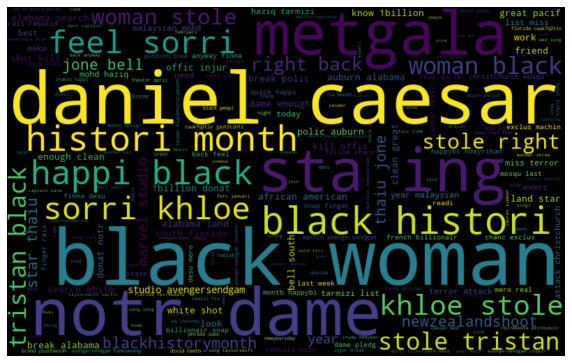

In [136]:
# Wordcloud visualization for precovid df

text_blob_visualization(precovid_cleaned_df)

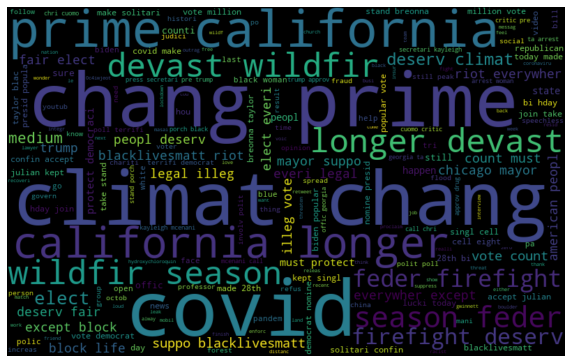

In [137]:
# Wordcloud visualization for covid df

text_blob_visualization(covid_timeline_cleaned_df)

<AxesSubplot:ylabel='followers_count'>

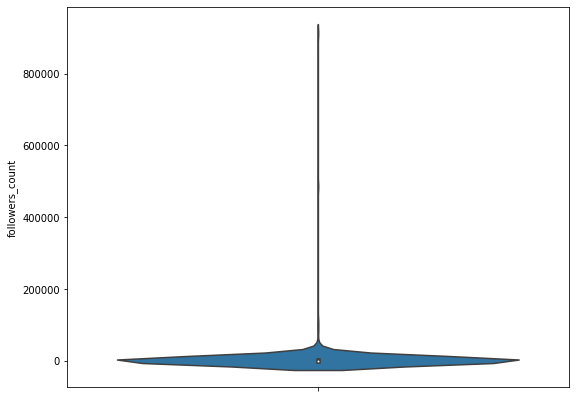

In [138]:



fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = precovid_cleaned_df["followers_count"] ) 

<AxesSubplot:ylabel='followers_count'>

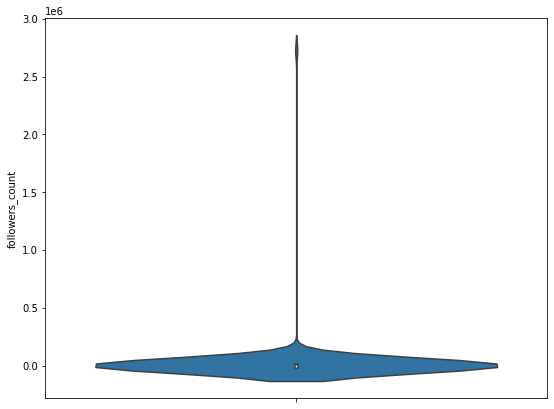

In [139]:
import seaborn as sns

fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = covid_timeline_cleaned_df["followers_count"] ) 

In [140]:
# word2vec embedding visualization

from gensim.models import Word2Vec
import scipy
nltk.download('punkt')

def word2vec_embeddings(df):
    text= ' '.join(df['tweet'])
    sentence=text.split()
    tokens=[nltk.word_tokenize(words) for words in sentence]
    print(len(tokens))
    model = Word2Vec(tokens[:100],size=50,sg=1,min_count=1)
    # Learned vocabulary
    words=list(model.wv.vocab)
    X=model[model.wv.vocab]
    newdf=pd.DataFrame(X)
        
    #Computing the correlation matrix
    X_corr=newdf.corr()

    #Computing eigen values and eigen vectors
    values,vectors=scipy.linalg.eigh(X_corr)

    #Sorting the eigen vectors coresponding to eigen values in descending order
    args = (-values).argsort()
    values = vectors[args]
    vectors = vectors[:, args]

    #Taking first 2 components which explain maximum variance for projecting
    new_vectors=vectors[:,:2]

    #Projecting it onto new dimesion with 2 axis
    neww_X=np.dot(X,new_vectors)
    
    plt.figure(figsize=(13,7))
    plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
    plt.xlabel("PC1",size=15)
    plt.ylabel("PC2",size=15)
    plt.title("Word Embedding Space",size=20)
    vocab=list(model.wv.vocab)
    for i, word in enumerate(vocab):
        plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\revan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


5513


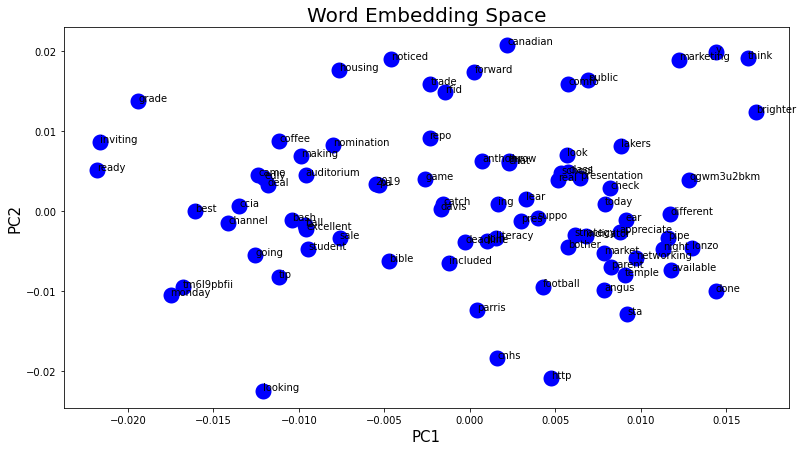

In [141]:
word2vec_embeddings(precovid_cleaned_df)

2002


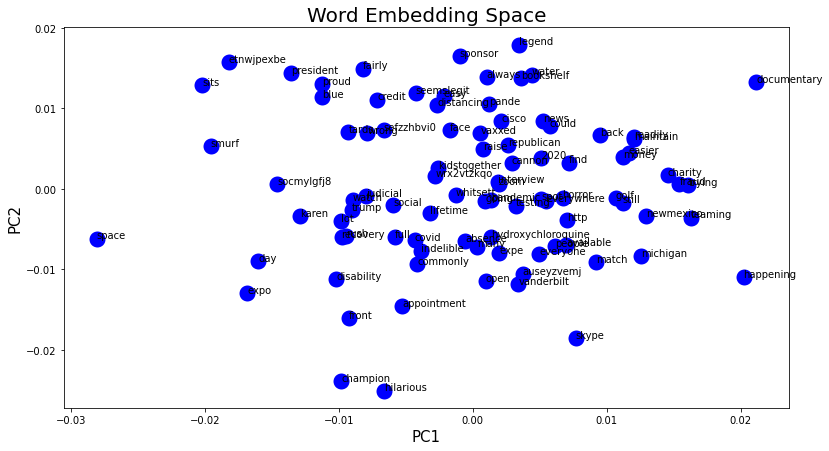

In [142]:
word2vec_embeddings(covid_timeline_cleaned_df)

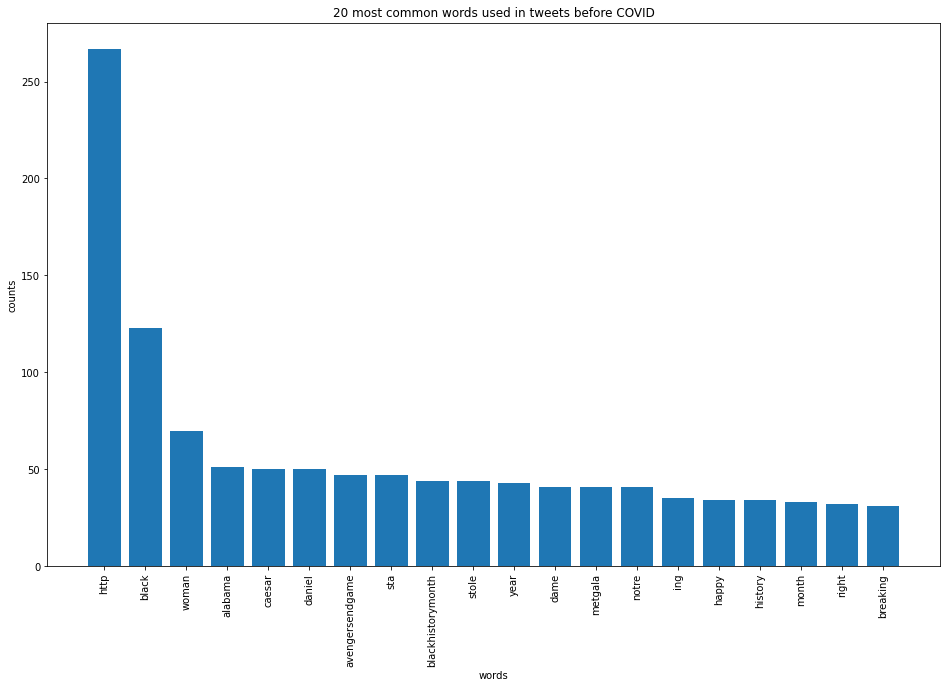

In [143]:
def plot_20_most_common_tokens(data, count_vectorizer ,plot_title):
    tokens = count_vectorizer.get_feature_names()
    tokenCounts = np.zeros(len(tokens))
    for item in data:
        tokenCounts+= item.toarray()[0]
    
    countStore = (zip(tokens, tokenCounts))
    countStore = sorted(countStore, key=lambda x:x[1], reverse=True)[0:20]
    tokens = [w[0] for w in countStore]
    plot_X = [w[1] for w in countStore]
    xcoords = np.arange(len(tokens)) 
    plt.figure(figsize=(16, 10))
    plt.bar(xcoords, plot_X,align='center')
    plt.xticks(xcoords, tokens, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title(plot_title)
    plt.show()
#     plt.savefig("accounts_precovid.png")

count_vectorizer = CountVectorizer(stop_words='english')
data = count_vectorizer.fit_transform(precovid_cleaned_df['tweet'])

# Generating plot
plot_20_most_common_tokens(data, count_vectorizer,'20 most common words used in tweets before COVID')


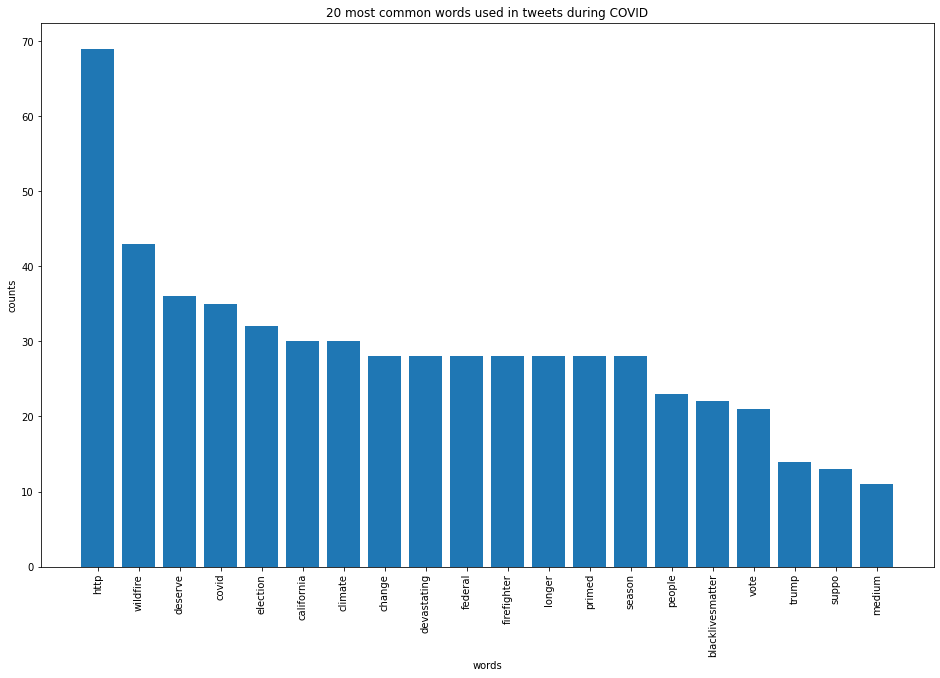

In [145]:
# Use countvectorizer for Fitting and transforming the processed tweets
data = count_vectorizer.fit_transform(covid_timeline_cleaned_df['tweet'])

# Plot a visualization for the 20 most common words
plot_20_most_common_tokens(data, count_vectorizer,'20 most common words used in tweets during COVID')